# MAT 221 Calculus I

## April 9, 2020

Today's Agenda:
1. Continuous Function
2. Intermediate Value Theorem
3. Exercises

# Implicit Differentiation

An explicit function is of the form that should be the most familiar, such as:

$$ f(x) = x^2 + 3 $$
$$ y = \sin{x} $$

Whereas an *implicit function* defines an algebraic relationship between variables. These functions have a form similar to the following:

$$ x^2 + y^2 = 25 $$
$$ y^5 + xy = 3 $$

In these examples and the following exercises, it is assumed $y$ is implicitly defined and is a differentiable function of $x$.

Luckily, implicitly defined equations do not need to be solved for $y$ in terms of $x$ (or any other variable) to calculate the derivative of the function. We can employ *implicit differentiation* to find the deriatives of implicitly defined equations.

Implicit differentiation is performed by differentiating both sides of the equation with respect to $x$ and then solving for the resulting equation for the derivative of $y$.

As an example, consider the function $y^3 + x^3 = 1$. We can apply implicit differentiation to this equation to find its deriative. Begin by differentiating both sides of the equation with respect to $x$.

$$ \frac{d}{dx} (y^3 + x^3) = \frac{d}{dx} (1) $$

$$ \frac{d}{dx} (y^3) + \frac{d}{dx} (x^3) = 0 $$

Remembering that $y$ is implicitly defined as a function of $x$, we apply the Chain Rule for finding the derivative of $y^3$. 

$$ 3y^2 \frac{dy}{dx} + 3x^2 = 0 $$

Then, solving for $\frac{dy}{dx}$:

$$ 3y^2 \frac{dy}{dx} = -3x^2 $$

$$ \frac{dy}{dx} = -\frac{3x^2}{3y^2} = -\frac{x^2}{y^2} $$

When dealing with more complex equations that feature more terms, it can be helpful to use Newton notation such as $y^\prime$ to help keep the intermediate calculations easier to read.

We can confirm our result by using the [SymPy package](http://docs.sympy.org/latest/index.html) as before. Import the needed functions and set $x$ and $y$ as variables to be recognized by SymPy.

In [2]:
from sympy import symbols, idiff, sin, cos, tan, sqrt, init_printing, plot_implicit

init_printing()
x = symbols('x')
y = symbols('y')

As we are finding the derivatives of implicitly defined functions, we use the `idiff` function rather than `diff` as seen in previous examples.

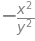

In [3]:
idiff(y ** 3 + x ** 3 - 1, y, x)

## Examples

### Example 1: Find the derivative of the implicit function $x^2 + xy - y^2 + 4$.

We begin by taking the derivative of both sides of the equation after subtracting $4$ from both sides.

$$ \frac{d}{dx} (x^2 + xy - y^2) = \frac{d}{dx} (-4) $$

Then taking each derivative in turn:

$$ \frac{d}{dx} (x^2) + \frac{d}{dx} (xy) - \frac{d}{dx} (y^2) = 0 $$

Remembering that $y$ is implicitly defined as a function of $x$, we apply the Product Rule when finding the derivative $\frac{d}{dx} (xy)$.

$$ y \frac{dx}{dy} x + x \frac{dy}{dx} = yx^\prime + y^\prime x $$ 

Finding the remaining derivatives of the function:

$$ 2x + yx^\prime + y^\prime x - 2yy^\prime = 0 $$

The derivative of $x$ is $1$. The derivative $\frac{d}{dx}$ is found using the Chain Rule:

$$ \frac{d}{dx} (y^2) = \frac{d}{dy} (y^2) \frac{dy}{dx} = 2y \frac{dy}{dx} = 2yy^\prime $$

Finish finding the derivative of the equation:

$$ 2x + y + y^\prime x - 2yy^\prime = 0 $$

Isolate $y^\prime$ to one side by subtracting $2x + y$ from both sides.

$$ y^\prime x - 2y y^\prime = -2x - y $$

Factor $y^\prime$ on the left side:

$$ y^\prime (2y - x) = -2x - y $$

Divide both sides by $x - 2y$.

$$ y^\prime = \frac{dy}{dx} = - \frac{2x - y}{x - 2y} $$

Check our answer using SymPy:

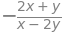

In [4]:
idiff(x ** 2 + x * y - y ** 2 + 4, y, x)

For those interested, the implicit equations and their derivatives can be plotted easily using SymPy's [`plot_implicit()`](http://docs.sympy.org/latest/modules/plotting.html) function.

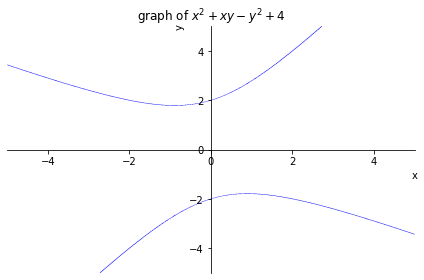

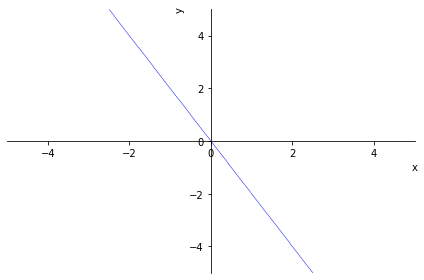

In [5]:
plot_implicit(x ** 2 + x * y - y ** 2 + 4, title = 'graph of $x^2 + xy - y^2 + 4$')
plot_implicit(-(2 * x + y) / (x - 2 * y))

### Example 2: Find the derivative of the implicit equation $x^4 (x + y) = y^2 (3x - y)$

Focus on the left-hand side of the equation for now. Differentiate both sides of the equation and apply the Product Rule to the left-hand side.

$$ x^4 \frac{d}{dx} (x + y) + (x + y) \frac{d}{dx} x^4 = \frac{d}{dx} (y^2 (3x - y)) $$

$$ x^4 \frac{d}{dx} (x) + \frac{d}{dx} (y) + (x + y) \frac{d}{dx} x^4 = \frac{d}{dx} (y^2 (3x - y)) $$

Calculate the derivatives on the left-hand side of the equation:

$$ x^4(1 + y^\prime) + 4x^3(x + y) = y^2 \frac{d}{dx}(3x - y) + (3x - y) \frac{d}{dx} y^2 $$

Shift focus to the right-hand side of the equation:

$$ y^2 (\frac{d}{dx} 3x - \frac{d}{dx} y) + (3x - y) \frac{d}{dx} y^2 $$
$$ = y^2(3 - y^\prime) + 2yy^\prime (3x - y) $$

Thus, we now have:

$$ x^4(1 + y^\prime) + 4x^3 (x + y) = y^2(3 - y^\prime) + 2yy^\prime (3x - y) $$

Expand and clean up the terms:

$$ x^4 + x^4 y^\prime + 4x^4 + 4x^3 y = 3y^2 - y^2 y^\prime + 6xyy^\prime - 2y^2 y^\prime $$

$$ 5x^4 + x^4 y^\prime + 4x^3 y = 3y^2 + 6xyy^\prime - 3y^2 y^\prime $$

We then want to isolate $y^\prime$ to one side of the equation.

$$ 5x^4 + x^4 y^\prime + 4x^3 y - 6xyy^\prime + 3y^2 y^\prime = 3y^2 $$

$$ x^4 y^\prime - 6xyy^\prime + 3y^2 y^\prime = 3y^2 - 5x^4 - 4x^3 y $$

Finish calculating the derivative by factoring $y^\prime$ on the left-hand side of the equation and dividing:

$$ y^\prime (x^4 - 6xy + 3y^2) = 3y^2 - 5x^4 - 4x^3 y $$

$$ y^\prime = \frac{3y^2 - 5x^4 - 4x^3 y}{x^4 - 6xy + 3y^2} $$

Using SymPy as before, we can verify our answer is correct.

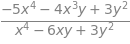

In [6]:
idiff(x ** 4 * (x + y) - y ** 2 * (3 * x - y), y, x)

Also, for fun, we can plot the implicit function and its derivative as we did previously. Implicit functions, such as the one we just worked with, often make very appealing curves and graphs. For example, the previous implicit equation makes a unique bowtie like shape when plotted.

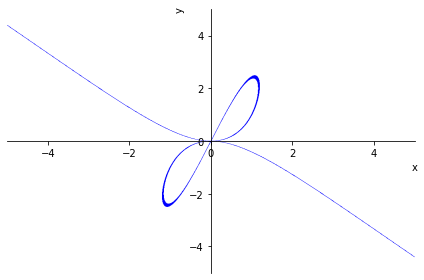

In [7]:
plot_implicit(x ** 4 * (x + y) - y ** 2 * (3 * x - y))

The derivative of the equation can be plotted similarly.

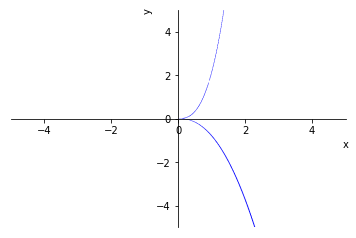

In [37]:
plot_implicit((-5 * x ** 5 - 4 * x ** 3 * y + 3 * y ** 2) / (x ** 4 - 6 * x * y + 3 * y ** 2))

### Example 3: Derivative of the equation $4 \cos{x} \space \sin{y} = 1$

Plotting the implicit equation $4 \cos{x} \space \sin{y} = 1$ reveals a rather unique and interesting graph.

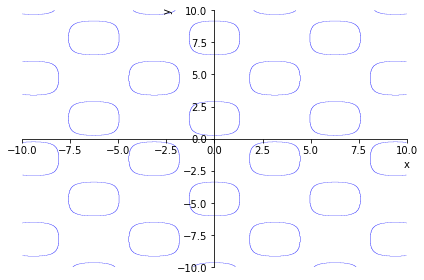

In [8]:
plot_implicit(4 * cos(x) * sin(y) - 1, (x, -10, 10), (y, -10, 10))

The derivative of the implicit equation can be found as in the previous examples. Start by differentiating both sides of the equation:

$$ 4 (\cos{x} \frac{d}{dx} \sin{y} + \sin{y} \frac{d}{dx} \cos{x}) = \frac{d}{dx} \space 1 $$

Then we calculate each derivative in turn, recalling that $y$ is implicitly defined as a function of $x$ and thus need to apply the Chain Rule to find the deriviative $\frac{d}{dx} \sin{y}$.

$$ 4(\cos{x} \space y^\prime \cos{y} - \sin{y} \space \sin{x}) = 0 $$

Expanding the terms:

$$ 4 \cos{x} \space y^\prime \cos{y} - 4 \sin{y} \space \sin{x} = 0 $$

Isolate $y^\prime$ to one side of the equation.

$$ 4 y^\prime \cos{x} \space \cos{y} = 4 \sin{y} \sin{x} $$

$$ \frac{dy}{dx} = \frac{4 \sin{y} \sin{x}}{4 \cos{x} \space \cos{y}} $$

The derivative can be simplified further knowing that $\tan{x} = \frac{\sin{x}}{\cos{x}}$

$$ \frac{dy}{dx} = \tan{x} \tan{y} $$

Confirm our derivative is correct by checking against SymPy.

In [47]:
idiff(4 * cos(x) * sin(y) - 1, y, x)

The derivative of the implicit equation also makes for an interesting graph and creates a grid-like appearance.

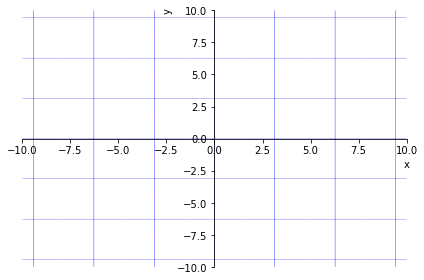

In [9]:
plot_implicit(tan(x) * tan(y), (x, -10, 10), (y, -10, 10))

## References

Stewart, J. (2007). Essential calculus: Early transcendentals. Belmont, CA: Thomson Higher Education.

Strang, G. (2010). Calculus. Wellesley, MA: Wellesley-Cambridge.

Weisstein, Eric W. "Implicit Function." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/ImplicitFunction.html